In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import seaborn as sns

plt.style.use('seaborn-notebook')
%config InlineBackend.figure_format = 'retina'

$$\frac{d}{dt}x = \sigma(y - x)$$  
$$\frac{d}{dt}y = x(\rho - z)$$  
$$\frac{d}{dt}z = xy - \beta z$$  

In [2]:
def lorenz(time, state, params):
#     state  = [x, y, z]
#     params = [sigma, rho, beta]

    dx = params[0] * (state[1] - state[0])
    dy = state[0] * (params[1] - state[2])
    dz = state[0]*state[1] - params[2]*state[2]
    
    return([dx, dy, dz])

In [67]:
solutions = []
params = [10, 28, 8/3] # rho=160, 99.65, 100.5, 350 -> periodic
x0 = [0, 1, 20]
times = np.arange(0.001, 100, 0.001)

solver = integrate.ode(lorenz).set_integrator('dopri5')
solver.set_initial_value(x0, 0)
solver.set_f_params(params);

for t in times:
    solutions.append( solver.integrate(t) )
    
x, y, z = zip(*solutions)

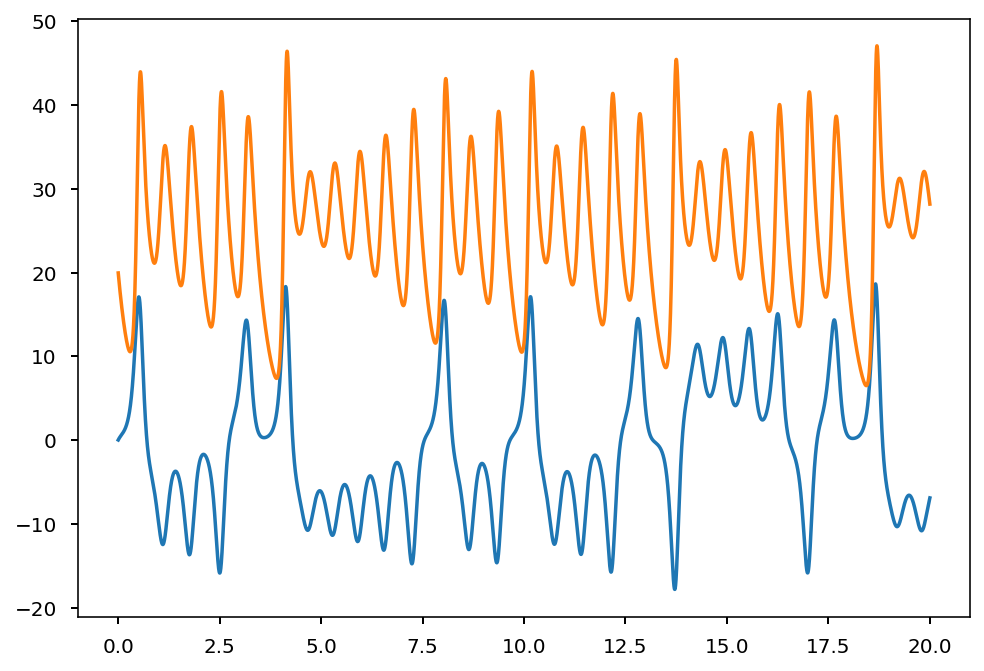

In [76]:
plt.plot(times[:20000], x[:20000])
plt.plot(times[:20000], z[:20000]);

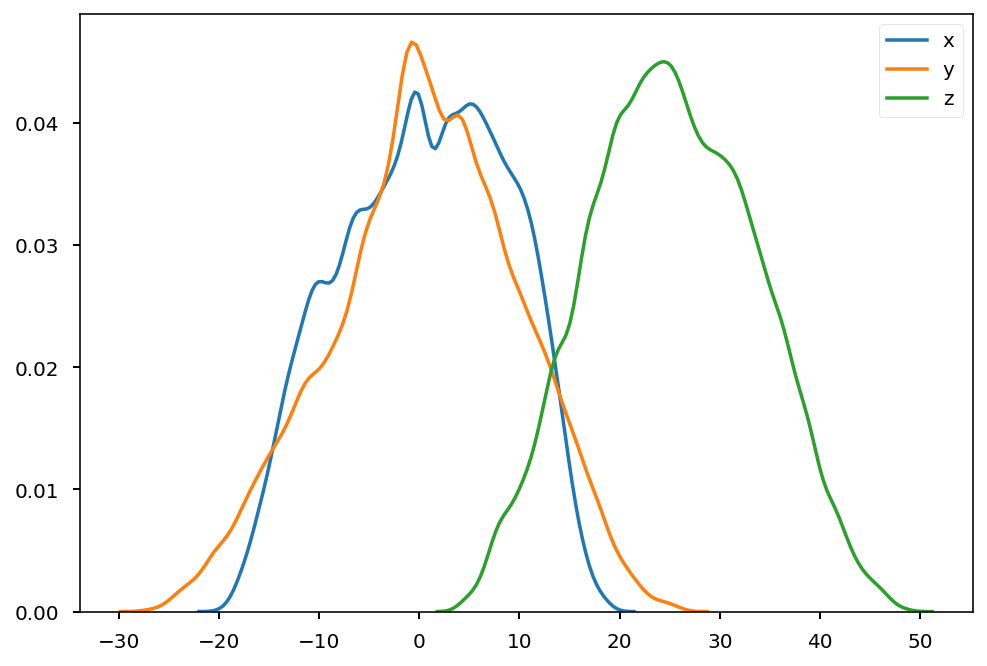

In [69]:
sns.distplot(x, hist=False, label='x')
sns.distplot(y, hist=False, label='y')
sns.distplot(z, hist=False, label='z')
plt.legend();

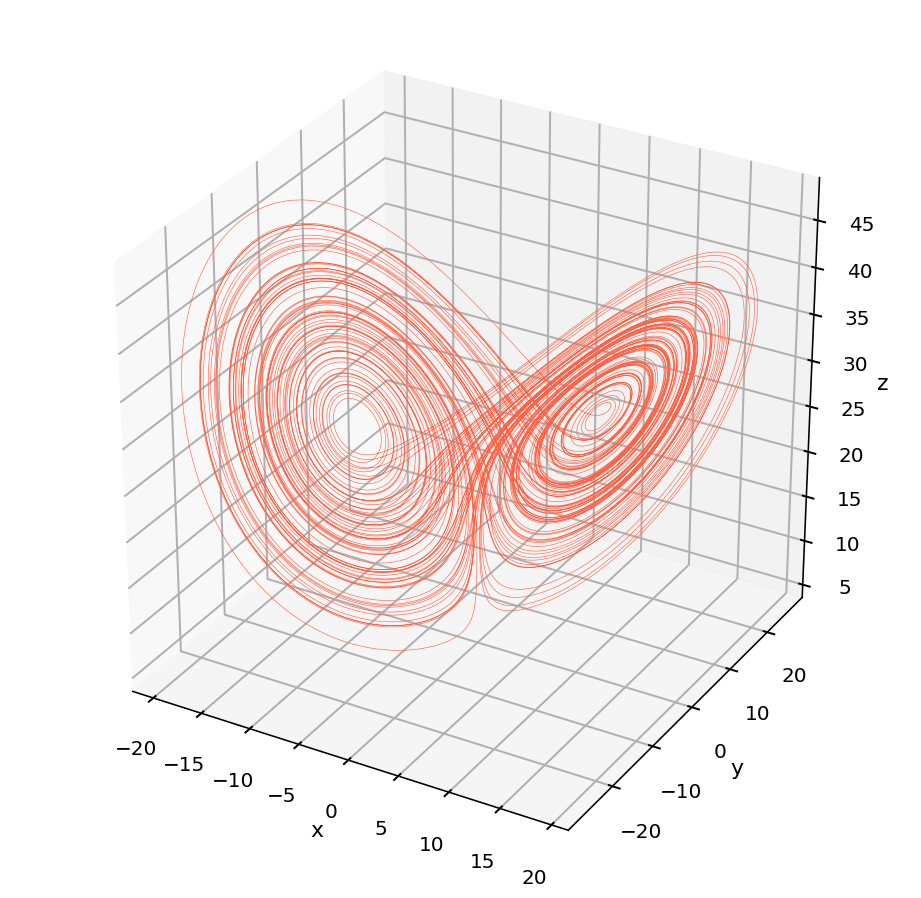

In [70]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, '-', linewidth=0.3, alpha=1, color='tomato')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# ax.view_init(90, 100)